In [1]:
import pandas as pd

In [1]:
dataroot="CIC_IDS2017_Dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
from utilities import convert_base_to_standard_dataset
df = convert_base_to_standard_dataset(dataroot)
df.head()

Number of Base Dataset Columns: 78
Number of Own Dataset Columns: 84
These are the fields in our own dataset that we need to retain :
 {'Timestamp', 'Flow ID', 'Src Port', 'Dst IP', 'Src IP', 'Protocol'} 



,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
dataroot="/home/haktrak/Downloads/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df=pd.read_csv(dataroot,header=0,low_memory=False)
pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df['Flow Bytes/s']=df['Flow Bytes/s'].astype('float64')
df[' Flow Packets/s']=df[' Flow Packets/s'].astype('float64')
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].mean(),inplace=True)
df[' Label'] = df[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

In [3]:
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df[' Label'], test_size=0.3, random_state=42)


In [6]:
from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, algorithm = 'ball_tree', leaf_size=500)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print("Recall is {}." .format(round(recall,4)))
print("F is {}.".format(round(f1_score(y_test,y_predict),4)))

Recall is 0.9994.
F is 0.9996.


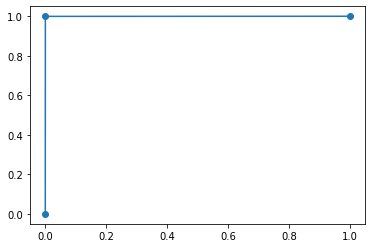

AUC is 0.9994.


In [11]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
plt.plot(fpr,tpr,marker = 'o')
plt.show()
from sklearn.metrics import auc
AUC = auc(fpr, tpr)
print ("AUC is {}.".format(round(recall,4)))

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_predict)

array([[29255,     7],
       [   25, 38437]])